about  data 
1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model.

In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Task - Predict the diamond price.💎
    Write the KNN code from scratch and make it work on the given dataset ?


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
from sklearn.model_selection import train_test_split

features = ['carat','cut','color','clarity','depth','table','x','y','z']
target = 'price'

X = data[features].copy()
y = data[target].values

X_train , X_test , y_train,y_test = train_test_split(X,y , train_size=0.75)

X_train.shape,X_test.shape,y_train.shape,y_test.shape


((40455, 9), (13485, 9), (40455,), (13485,))

<Axes: xlabel='cut', ylabel='count'>

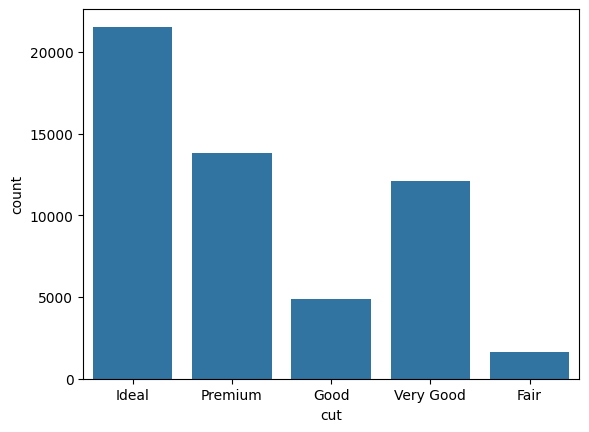

In [5]:
import seaborn as sns

sns.countplot(x=data['cut'])

In [6]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [7]:
# Encoding
cat_cols = ['cut','color','clarity']

encoder = OrdinalEncoder()
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_test[cat_cols]  = encoder.transform(X_test[cat_cols])

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [8]:
import numpy as np
from collections import Counter
def eculidean_distance(x1,x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance


class KNN:
    def __init__(self,k=3):
        self.k  = k


    def fit(self,X,y):
        self.X_train = X
        self.y_train = y

    def predict(self,X):
        X = np.array(X)
        predictions = [self._predict(x) for x in X]
        return predictions
    
    def _predict(self,x):

        # Compute the distances
        # distances= [eculidean_distance(x,x_train) for x_train in self.X_train]
        distances = np.linalg.norm(self.X_train - x, axis=1)


        # get  the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train [i] for i in k_indices]


        # majority vote
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        return most_common
    

In [9]:
clf  = KNN(k=5)

clf.fit(X_train_scaled,y_train)


In [10]:
preds = clf.predict(X_test_scaled)

In [11]:
rmse = np.sqrt(np.mean((y_test - preds) ** 2))
print(rmse)

948.7906591384489


In [12]:

# for k in [1,3,5,7,9,15]:
#     clf = KNN(k=k)
#     clf.fit(X_train, y_train)
#     preds = clf.predict(X_test)
#     rmse = np.sqrt(np.mean((y_test - preds)**2))
#     print(k, rmse)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
kclf = KNeighborsClassifier(n_neighbors=5)
kclf.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [18]:
pred = kclf.predict(X_test_scaled)

In [19]:
rmse = np.sqrt(np.mean((y_test - pred) ** 2))
print(rmse)

1342.304993477091
